In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os

C:\Users\Krist\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def getStatistics(files):
    if files == 1:
        filesForProcessing = availableFiles[:]
        
    elif isinstance(files,list):
        filesForProcessing = files[:]
    else:
        print("Incorrect format - please specify either a list or '1'")
    
    for element in filesForProcessing:
        print("-----------------------------------------------------------------------------------------------")
        print("The file being processed is: %s" % element)
        
        with open(path + "/"+element,"r") as file:
            temp = file.readlines()

        tempClean = [re.sub("[\n ]","",i) for i in temp]

        if len(tempClean[0]) == 1:

            tempClean = [int(i) for i in tempClean]

            uniqueVals, counts = np.unique(tempClean,return_counts = True)# Perhaps should listOfObs be sorted?

            if len(uniqueVals) > 50:
                print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
#                     answer = input("There are more than 50 unique values, do you want to see them? ")

#                     if (answer == 'yes') or (answer == 'Yes'):
#                         print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                         print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                plt.hist(tempClean)
                plt.title("Distribution of the data")
                plt.show()
            else:
                print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

        else:

            tempClean = [re.split(",",i) for i in tempClean]

            lenOfElements = len(tempClean[0])

            database = [[] for i in np.arange(lenOfElements)]

            # Dividing in the observations
            for observation in tempClean:
                for partial in enumerate(observation):

                    database[partial[0]].append(int(partial[1]))

            # Getting information on the content of each list in the database.
            print("\nThe file contains %i separate streams of values." % lenOfElements)
            for listOfObs in database:
                uniqueVals, counts = np.unique(listOfObs,return_counts = True)# Perhaps should listOfObs be sorted?

                if (all(counts == 1)):
                    answer = input("\nAll values of the variable currently being processed is equal to one, which indiates\
that the values are numberic of other values. Do you want to disregard the processing of these values? ")
                    if (answer == 'no') or (answer == 'No'):
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

                else:
                    if len(uniqueVals) > 50:
#                             answer = input("There are more than 50 unique values, do you want to see them? ")

#                             if (answer == 'yes') or (answer == 'Yes'):
#                                 print("The unique values and their frequency count, presented as {unique Value: Count}, are:\n")
#                                 print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")
                        print("\nThere are more than 50 unique values, so a histogram over the values are shown.")
                        plt.hist(listOfObs)
                        plt.title("Distribution of the data")
                        plt.show()
                    else:
                        print("\nThe unique values and their frequency count, presented as {unique Value: Count}, are:\n")
                        print({uniqueVal:count for uniqueVal,count in zip(uniqueVals,counts)},"\n")

In [3]:
availableFolders = {}
folderCount = 0

for element in os.listdir("../../Exported_Data"):#os.listdir("../Assets/Exported_Data"):
    if ("txt" not in element) and ("meta" not in element):
        availableFolders[folderCount] = element
        folderCount += 1
        

In [4]:
print("The available folders, containing the data of interest, are:")
availableFolders

The available folders, containing the data of interest, are:


{0: 'Baseline-1.0',
 1: 'Baseline-1.0.1',
 2: 'Baseline-1.1',
 3: 'Baseline-1.1.2',
 4: 'Baseline-1.2',
 5: 'Baseline-1.3',
 6: 'CcCLStaticDynamic-1.8',
 7: 'CLStaticDynamicObstacles-1.0',
 8: 'CLStaticDynamicObstacles-1.0.1',
 9: 'CLStaticDynamicObstacles-1.0.2',
 10: 'CLStaticDynamicObstacles-1.0.3',
 11: 'CLStaticDynamicObstacles-1.0.4',
 12: 'CLStaticDynamicObstacles-1.0.5',
 13: 'CLStaticDynamicObstacles-1.0.5.1',
 14: 'CLStaticDynamicObstacles-1.1',
 15: 'CLStaticDynamicObstacles-1.7',
 16: 'CLStaticDynamicObstacles-1.8',
 17: 'CLStaticDynamicVS3',
 18: 'CLStaticDynamicVS6-1',
 19: 'FullSetUpCertain-1.0',
 20: 'FullSetUpCertain-1.1',
 21: 'FullSetUpCertain-1.1.1',
 22: 'FullSetUpCertain-1.1.2',
 23: 'FullSetUpCertain-1.1.2.1',
 24: 'FullSetUpCertain-1.1.3',
 25: 'FullSetUpCertain-1.1.3.1',
 26: 'FullSetUpCertain-1.2',
 27: 'FullSetUpCertain-1.3',
 28: 'FullSetUpCertain-2.0',
 29: 'FullSetUpCertain-2.1',
 30: 'FullSetUpCertain-2.2',
 31: 'FullSetUpCertain-2.3',
 32: 'FullSetUpUnce

In [5]:
path = "../../Exported_Data/"+availableFolders[23]# <- Choose the folders from above

In [6]:
os.listdir(path)

['Area_Env4_2-0_pedCount.txt',
 'Area_Env4_2-0_sensorCloudCount.txt',
 'Area_Env4_2-0_stepsToGoal.txt']

In [52]:
files = np.unique([re.split("_", file)[-1] for file in np.array(os.listdir(path))])

In [53]:
files

array(['pedCount.txt', 'sensorCloudCount.txt', 'stepsToGoal.txt'],
      dtype='<U20')

In [54]:
# fT = [[] for file in files]
fT = []
for j,fileType in enumerate(files):
    
    if j == 0:
        print("First layer of the variable contains: \n\n", files)
    
    FoI = [file for file in os.listdir(path) if fileType in file]
    
#     CFoI = [[] for file in FoI]
    CFoI = []
    
    for i,individualFile in enumerate(FoI):
        
        if (i == 0) and (j == 0):
            print("\nSecond layer of the variable contains: \n\n", FoI)
        
        with open(path+"/"+individualFile,"r") as file:
            content = file.readlines()
        
        cleanFirst = re.split(",",re.sub("[\n ]","",content[0]))

        hold = [[] for numbObs in np.arange(len(cleanFirst))]

        for l,obs in enumerate(content):
            if (i == 0) and (j == 0) and (l == 0):
                print("\n\nThe third layer contains individual data streams for a given file type.")
            c = re.split(",",re.sub("[\n ]","",obs))
            
            [hold[o].append(int(c[o])) for o in np.arange(len(c))]
#         print(len(hold))
#     print(len(CFoI))
        CFoI.append(hold)
    fT.append(CFoI)            

First layer of the variable contains: 

 ['pedCount.txt' 'sensorCloudCount.txt' 'stepsToGoal.txt']

Second layer of the variable contains: 

 ['Area_Env4_2-0_pedCount.txt']


The third layer contains individual data streams for a given file type.


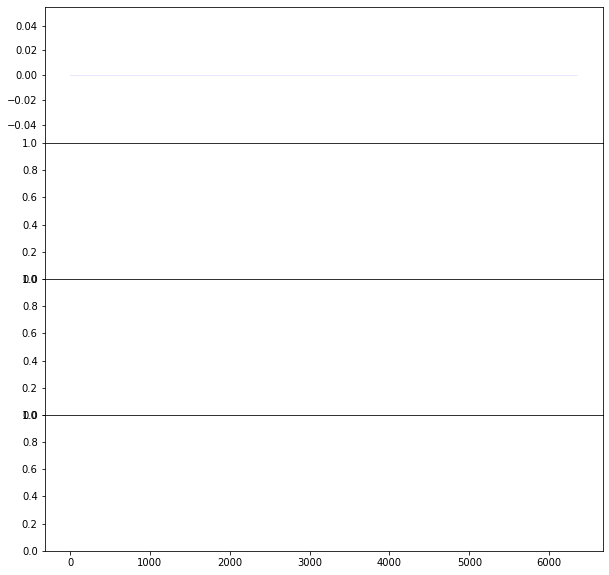

In [56]:
fig,(ax,bx,cx,dx) = plt.subplots(4,1,figsize=(10,10),sharex=True,gridspec_kw = {'wspace':0, 'hspace':0})

plots = [ax,bx,cx,dx]
colors = ['b','r','g','m']
for ele,pt,c in zip(fT[1],plots,colors):
#     print(len(ele[0]))
    pt.plot(ele[0],linewidth=0.1,c=c)

In [47]:
hej = []
for ft in fT[0]:
    ma = 125
    startInt = 0
    sC = []
    
    maRange = np.arange(ma, len(ft[0]))
    
    for maObs in maRange:
        
        vals, freq =  np.unique(np.array(ft[0])[startInt:maObs],return_counts = True)

        if len(freq) > 1:
            sC.append(freq[1]/sum(freq))
        else:
            sC.append(0)
        startInt += 1
    hej.append(sC)

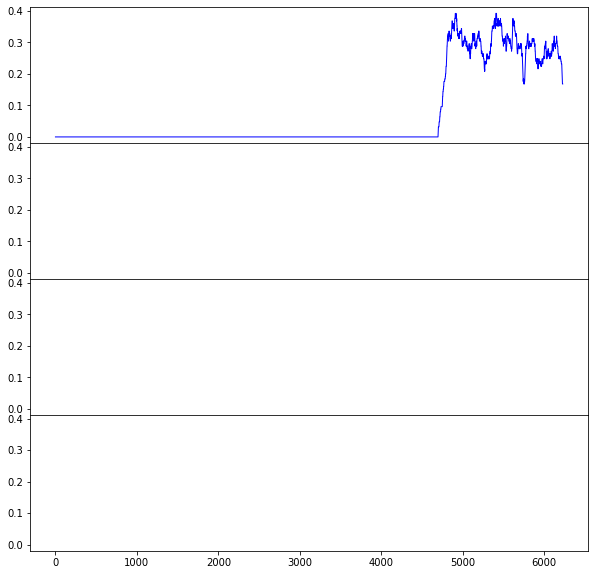

In [48]:
fig,(ax,bx,cx,dx) = plt.subplots(4,1,figsize=(10,10),sharex=True,sharey=True,
                                 gridspec_kw = {'wspace':0, 'hspace':0})

plots = [ax,bx,cx,dx]
colors = ['b','r','g','m']
for ele,pt,c in zip(hej,plots,colors):
#     print(len(ele[0]))
    pt.plot(ele,linewidth=1,c=c)

## Make those graphs

In [5]:
# TensorBoard data
path_ts = "../../summaries_for_processing/Baseline/csv_output"
tsFiles = [file for file in os.listdir(path_ts)\
           if "csv" in file]

In [6]:
tsFiles

['Baseline-1.0.1-0.csv',
 'Baseline-1.1.2-0.csv',
 'Baseline-1.2-0.csv',
 'Baseline-1.3-0.csv']

Average number of episodes with crowded areas 3012
Average number of episodes with crowded areas 1102
Average number of episodes with crowded areas 2376
Average number of episodes with crowded areas 1889


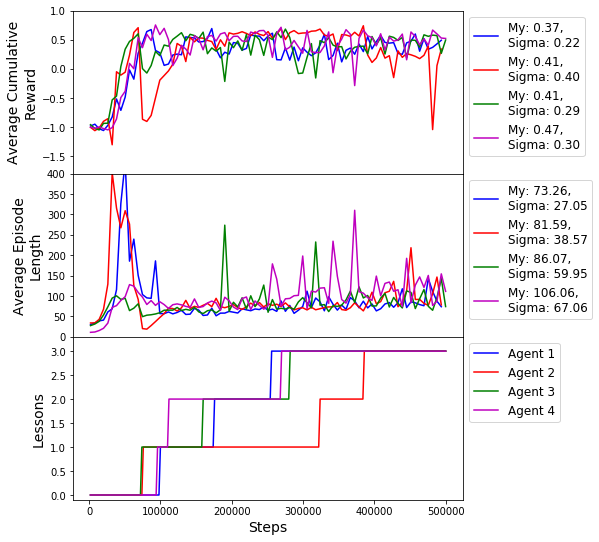

In [7]:
fig,(ax,bx,cx) = plt.subplots(3,1,figsize=(7,9),
                                 gridspec_kw = {'wspace':0, 'hspace':0})

caEpisodes = []
colors = ['b','r','g','m']
labels_3 = ['Agent 1','Agent 2','Agent 3','Agent 4']
labels_1 = []
labels_2 = []
style = ['-','-','-','-']
for file,c,s in zip(tsFiles,colors,style):

    data = pd.read_csv(path_ts+"/"+file,index_col=0)
    data.columns = np.array(data.columns).astype(float).astype(int)
    # Alternative way of evaluating the effcientcy of dealing with crowded areas
    
    test = data.loc[3][data.loc[3]>=3]
#     print(test.index[-1])
    test_1 = data.loc[2][data.loc[3]>=3]
    print("Average number of episodes with crowded areas %i" % ((test.index[-1]-test.index[0])/test_1.mean()))
    caEpisodes.append((test.index[-1]-test.index[0])/test_1.mean())
    labels_1.append("My: %.2f,\nSigma: %.2f" % (data.iloc[0,49:].mean(),data.iloc[0,49:].std()))
    labels_2.append("My: %.2f,\nSigma: %.2f" % (data.iloc[1,49:].mean(),data.iloc[1,49:].std()))
    
    # Smooth the series for visualisation purpose
    ael = []
    acr = []
    ma = 3
    maRange = np.arange(ma,len(data.loc[1]),ma)
    step = 0
    
    for obs in maRange:
        
        acr.append(np.array(data.iloc[0,step:obs]).mean())
        ael.append(np.array(data.iloc[1,step:obs]).mean())
        
        step += ma
    
    ax.plot(acr,c = c,linestyle=s)
    bx.plot(ael,c = c,linestyle=s)
    cx.plot(data.loc[3],c = c,linestyle=s)
#     ax.plot(data.loc[1],c = c,linestyle=s)
#     bx.plot(data.loc[2],c = c,linestyle=s)
#     cx.plot(data.loc[3],c = c,linestyle=s)

# Add labels
ax.legend(labels_1,fontsize=12, bbox_to_anchor = (1,1))
bx.legend(labels_2,fontsize=12, bbox_to_anchor = (1,1))
cx.legend(labels_3,fontsize=12, bbox_to_anchor = (1,1))

# Set y limit
ax.set_ylim((-1.8,1))
bx.set_ylim(0,400)
cx.set_ylim(-0.1,3.3)

# Set axis labels
ax.set_ylabel('Average Cumulative\nReward',fontsize=14)
bx.set_ylabel('Average Episode\nLength',fontsize=14)
cx.set_ylabel('Lessons',fontsize=14)
cx.set_xlabel('Steps',fontsize=14)
# plt.savefig('graphs/Baseline_comparison_100.jpg',bbox_inches='tight',dpi=100)
plt.show()

In [8]:
availableFolders

{0: 'Baseline-1.0',
 1: 'Baseline-1.0.1',
 2: 'Baseline-1.1',
 3: 'Baseline-1.1.2',
 4: 'Baseline-1.2',
 5: 'Baseline-1.3',
 6: 'CcCLStaticDynamic-1.8',
 7: 'CLStaticDynamicObstacles-1.0',
 8: 'CLStaticDynamicObstacles-1.0.1',
 9: 'CLStaticDynamicObstacles-1.0.2',
 10: 'CLStaticDynamicObstacles-1.0.3',
 11: 'CLStaticDynamicObstacles-1.0.4',
 12: 'CLStaticDynamicObstacles-1.0.5',
 13: 'CLStaticDynamicObstacles-1.0.5.1',
 14: 'CLStaticDynamicObstacles-1.1',
 15: 'CLStaticDynamicObstacles-1.7',
 16: 'CLStaticDynamicObstacles-1.8',
 17: 'CLStaticDynamicVS3',
 18: 'CLStaticDynamicVS6-1',
 19: 'FullSetUpCertain-1.0',
 20: 'FullSetUpCertain-1.1',
 21: 'FullSetUpCertain-1.1.1',
 22: 'FullSetUpCertain-1.1.2',
 23: 'FullSetUpCertain-1.1.2.1',
 24: 'FullSetUpCertain-1.1.3',
 25: 'FullSetUpCertain-1.1.3.1',
 26: 'FullSetUpCertain-1.2',
 27: 'FullSetUpCertain-1.3',
 28: 'FullSetUpCertain-2.0',
 29: 'FullSetUpCertain-2.1',
 30: 'FullSetUpCertain-2.2',
 31: 'FullSetUpCertain-2.3',
 32: 'FullSetUpUnce

The number of collisions with crowded areas are: 757
The number of episodes are: 7118
The number of collisions with crowded areas are: 408
The number of episodes are: 7075
The number of collisions with crowded areas are: 585
The number of episodes are: 6971
The number of collisions with crowded areas are: 611
The number of episodes are: 6937


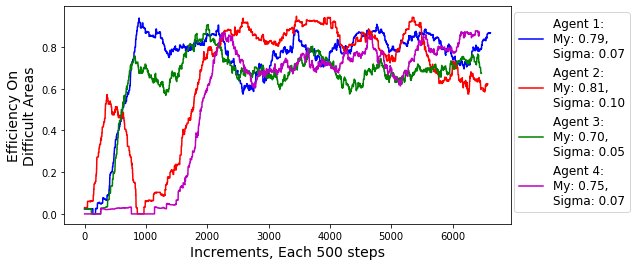

In [10]:
# The custom data

# fig,(ax,bx) = plt.subplots(1,1,figsize=(8,8),gridspec_kw = {'wspace':0, 'hspace':0.1})
fig,(bx) = plt.subplots(1,1,figsize=(8,4),gridspec_kw = {'wspace':0, 'hspace':0.1})
ma = 500

colors = ['b','r','g','m']
labels_1 = ['Agent 1','Agent 2','Agent 3','Agent 4']
labels_2 = []
caCollisions = []
episodes = []
for i,FoI in enumerate([1,3,4,5]):

    path = "../../Exported_Data/"+availableFolders[FoI]

    files = os.listdir(path)
    files = [file for file in files if any([True if neededfile in file else False \
                                            for neededfile in ['stepsCA.txt',
                                                               'stepsToGoal.txt']])]
    for filee in files:
        step = 0
        with open(path+"/"+filee,"r") as file:
            content = file.readlines()

        content = [re.split(",",re.sub("[ \n]","",obs)) for obs in content]

        maSeries = []
        if len(content[0]) == 2:
            
            first = []

            for obs in content:
                first.append(obs[0])
            print("The number of collisions with crowded areas are: %i" % len(first))
            caCollisions.append(len(first))
            first = np.array(first).astype(int)

            maRange = np.arange(ma,len(first))              
            
            for maObs in maRange:

                maData = first[step:maObs]

                maSeries.append(sum([True if obs == 0 else False for obs in maData])/len(maData))
                step += 1

        elif len(content[0]) == 3:

            first = []
            second = []
            third = []

            for obs in content:
                
                first.append(obs[0])
                second.append(obs[1])
                third.append(obs[2])

            first = np.array(first).astype(int)
            second = np.array(second).astype(int)
            third = np.array(third).astype(int)
            episodes.append(len(first))
            print("The number of episodes are: %i" % len(first))
            maRange = np.arange(ma,len(first))

            for maObs in maRange:

                maFirst = first[step:maObs]
                maThird = third[step:maObs]

                s,f = np.unique(maThird,return_counts = True)
                daGoal = sum([True if ((j == 1) and (i == 1)) else False for i,j in \
                              zip(maFirst,maThird)])
                
                if len(f) == 1:
                    maSeries.append(s)
                else:
                    maSeries.append(daGoal/f[1])

                step += 1
            labels_2.append("Agent %i:\nMy: %.2f,\nSigma: %.2f" % (i+1,np.array(maSeries)[2000:].mean(),
                                                        np.array(maSeries)[2000:].std()))
            bx.plot(maSeries,c=colors[i])

bx.set_xlabel('Increments, Each 500 steps',fontsize=14)
bx.set_ylabel('Efficiency On\nDifficult Areas',fontsize=14)
bx.legend(labels_2,loc=1,fontsize=12,bbox_to_anchor=(1.28,1))
# plt.savefig('graphs/Baseline_comparison_custom_100.jpg',bbox_inches='tight',dpi=100)
plt.show()

In [89]:
# Crowded area collisions
np.array(caCollisions)/np.array(caEpisodes)

array([0.25130436, 0.36993625, 0.24613397, 0.32344762])

In [15]:
# Share of episodes with crowded areas in

np.array(caEpisodes)/np.array(episodes)

array([0.42319242, 0.1558859 , 0.34094885, 0.27231123])